http://gulfcitizenscience.org/gbf_db
<br>time formats
<br>http://strftime.org/
<br>https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
bay_data = (pd.read_csv("Galveston Bay Foundation Data_20190516.csv")
            .dropna(how='any') # also filters only to highest-quality data
            .reset_index(inplace = False, drop = True))
bay_data.head(10)

,Date,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus
0,7/19/2018 10:03 am,Galveston Bay at Shoreacres Pier,27.0,28.0,5.6,8.0,14.10,1.0
1,7/18/2018 8:30 am,Jones Bay at Bayou Vista,28.0,29.5,3.4,8.0,23.60,20.0
2,7/18/2018 8:12 am,Jones Bay at Tiki Tom's RV Park,28.0,28.5,4.0,8.0,28.60,10.0
3,7/17/2018 8:00 am,Clear Lake at Watergate Yachting Center,27.0,29.0,3.8,8.6,10.95,1.0
4,7/15/2018 11:01 am,Clear Lake at Lakewood Yacht Club,30.0,30.0,6.1,9.0,9.30,10.0
5,7/15/2018 10:34 am,West Bay at Pirate's Cove,31.0,29.5,4.3,8.5,27.20,1.0
6,7/15/2018 10:18 am,Clear Lake at Blue Dolphin Yachting Center,31.5,30.0,6.5,9.0,9.70,1.0
7,7/15/2018 10:11 am,West Bay at Oak Bayou,31.0,29.0,5.3,7.5,27.70,1.0
8,7/15/2018 10:00 am,Galveston Bay at Pier 19,33.0,31.0,3.9,8.5,28.10,1.0
9,7/12/2018 9:59 am,Galveston Bay at Bayland Park,27.0,27.5,4.7,7.8,10.10,10.0


In [82]:
bay_data['Date'] =  pd.to_datetime(bay_data['Date'])
bay_data['Year'] = bay_data['Date'].dt.year
bay_data['Month'] = bay_data['Date'].dt.month
bay_data['Day'] = bay_data['Date'].dt.day
bay_data['Decimal_Date'] = bay_data['Year'] + bay_data['Month'] / 12 + bay_data['Day'] / 365
bay_data = bay_data[['Area', 'Air Temp (°C)', 'Water Temp (°C)', 'Dissolved Oxygen (mg/L)', 
                     'pH', 'Salinity (ppt)', 'Enterococcus', 'Decimal_Date']]
bay_data.head()

,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus,Decimal_Date
0,Galveston Bay at Shoreacres Pier,27.0,28.0,5.6,8.0,14.10,1.0,2018.635388
1,Jones Bay at Bayou Vista,28.0,29.5,3.4,8.0,23.60,20.0,2018.632648
2,Jones Bay at Tiki Tom's RV Park,28.0,28.5,4.0,8.0,28.60,10.0,2018.632648
3,Clear Lake at Watergate Yachting Center,27.0,29.0,3.8,8.6,10.95,1.0,2018.629909
4,Clear Lake at Lakewood Yacht Club,30.0,30.0,6.1,9.0,9.30,10.0,2018.624429


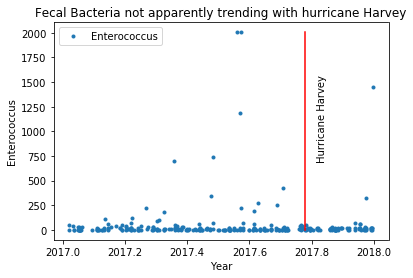

In [83]:
plt.plot(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Enterococcus'], 
         #label = 'posterior_cdf',
        linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Enterococcus'])],
         linestyle = '-', color = 'r')
plt.text(2017 + 8/12+40/265, 1500,'Hurricane Harvey',
     #horizontalalignment='center',
     #verticalalignment='center',
     #transform = ax.transAxes
         rotation = 90
    )
plt.xlabel('Year')
plt.ylabel('Enterococcus')
plt.title('Fecal Bacteria not apparently trending with hurricane Harvey')
plt.legend()
plt.show()

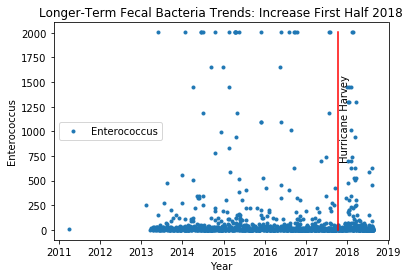

In [84]:
plt.plot(bay_data['Decimal_Date'], 
         bay_data['Enterococcus'], 
         #label = 'posterior_cdf',
        linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Enterococcus'])],
         linestyle = '-', color = 'r')
plt.text(2017 + 8/12+40/265, 1500,'Hurricane Harvey',
     #horizontalalignment='center',
     #verticalalignment='center',
     #transform = ax.transAxes
         rotation = 90
    )
plt.xlabel('Year')
plt.ylabel('Enterococcus')
plt.title('Longer-Term Fecal Bacteria Trends: Increase First Half 2018')
plt.legend()
plt.show()

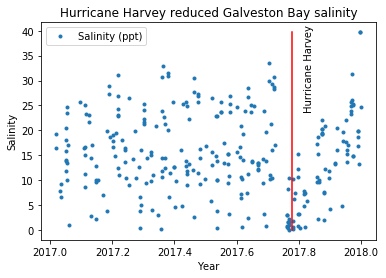

In [85]:
plt.plot(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Salinity (ppt)'], 
         #label = 'posterior_cdf',
        linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Salinity (ppt)'])],
         linestyle = '-', color = 'r')
plt.text(2017 + 8/12+40/265, 
         np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Salinity (ppt)']),
         'Hurricane Harvey',
     #horizontalalignment='center',
     #verticalalignment='center',
     #transform = ax.transAxes
         rotation = 90
    )
plt.xlabel('Year')
plt.ylabel('Salinity')
plt.title('Hurricane Harvey reduced Galveston Bay salinity')
plt.legend()
plt.show()

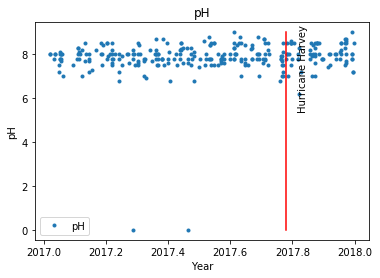

In [86]:
plt.plot(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['pH'], 
         #label = 'posterior_cdf',
        linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['pH'])],
         linestyle = '-', color = 'r')
plt.text(2017 + 8/12+40/265, 
         np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['pH']),
         'Hurricane Harvey',
     #horizontalalignment='center',
     #verticalalignment='center',
     #transform = ax.transAxes
         rotation = 90
    )
plt.xlabel('Year')
plt.ylabel('pH')
plt.title('pH')
plt.legend()
plt.show()

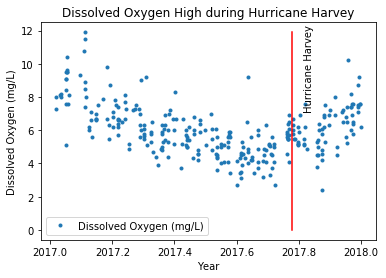

In [87]:
plt.plot(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & (bay_data['Decimal_Date'] < 2018.0)]['Dissolved Oxygen (mg/L)'], 
         #label = 'posterior_cdf',
        linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Dissolved Oxygen (mg/L)'])],
         linestyle = '-', color = 'r')
plt.text(2017 + 8/12+40/265, 
         np.max(bay_data.loc[(bay_data['Decimal_Date'] >= 2017.0) & 
                                 (bay_data['Decimal_Date'] < 2018.0)]['Dissolved Oxygen (mg/L)']),
         'Hurricane Harvey',
     #horizontalalignment='center',
     #verticalalignment='center',
     #transform = ax.transAxes
         rotation = 90
    )
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Dissolved Oxygen High during Hurricane Harvey')
plt.legend()
plt.show()